In [1]:
#Import all the required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from pathlib import Path
warnings.simplefilter(action='ignore', category=FutureWarning)
import random
%matplotlib inline

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPU's Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPU's Available:  1


In [3]:
#update the path for local machine
#Move the images from Covid-19/Normal to train, test and valid
path = '/Users/stefanrodrigues/Documents/DataMiningDeepLearning/Assessment_1/DMV_Assess_1_Covid-19_Dataset'
os.chdir(path)
if os.path.isdir('train/normal') is False:
    os.makedirs('train/normal')
    os.makedirs('train/covid')
    os.makedirs('valid/normal')
    os.makedirs('valid/covid')
    os.makedirs('test/normal')
    os.makedirs('test/covid')
 
    train_covid_samples = random.sample(os.listdir(f'Covid-19/'), 70)
    for i in train_covid_samples:
            shutil.move(f'Covid-19/{i}', f'train/covid')

    train_normal_samples = random.sample(os.listdir(f'Normal/'), 70)
    for j in train_normal_samples:
            shutil.move(f'Normal/{j}', f'train/normal')

    valid_covid_samples = random.sample(os.listdir(f'Covid-19/'), 10)
    for k in valid_covid_samples:
         shutil.move(f'Covid-19/{k}', f'valid/covid')

    valid_normal_samples = random.sample(os.listdir(f'Normal/'), 10)
    for l in valid_normal_samples:
         shutil.move(f'Normal/{l}', f'valid/normal')

    test_covid_samples = random.sample(os.listdir(f'Covid-19/'), 20)
    for m in test_covid_samples:
         shutil.move(f'Covid-19/{m}', f'test/covid')

    test_normal_samples = random.sample(os.listdir(f'Normal/'), 20)
    for n in test_normal_samples:
         shutil.move(f'Normal/{n}', f'test/normal')

os.chdir('../../')

In [4]:
#Specify the train, valid and test folders
train_path = path + '/train'
valid_path = path + '/valid'
test_path = path + '/test'

In [5]:
#Preprocess the images for the model
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['covid', 'normal'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['covid', 'normal'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['covid', 'normal'], batch_size=10, shuffle=False)

Found 140 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [6]:
imgs, labels = next(train_batches)

In [7]:
#Plot Image function from tensorflow website
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

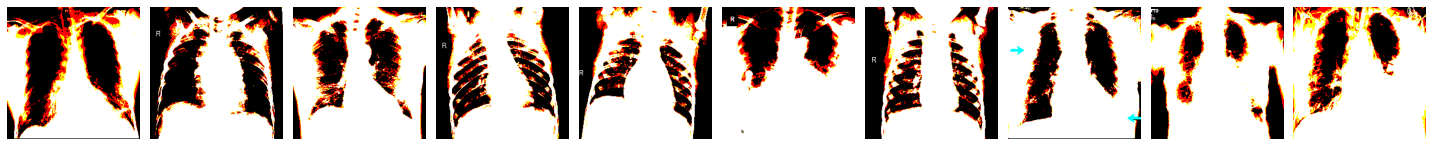

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [8]:
plotImages(imgs)
print(labels)

In [9]:
#Creating the model
model = Sequential([
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)),
        MaxPool2D(pool_size=(2, 2), strides=2),
        Dropout(0.2),

        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPool2D(pool_size=(2, 2),strides=2),
        Dropout(0.2),
        
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2),strides=2),
        Dropout(0.25),
        
        Flatten(),
        Dense(units=64, activation='relu'),
        Dropout(0.5),
        Dense(units=2, activation='softmax'),
])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-13 22:31:32.500535: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-13 22:31:32.501219: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 128)       7

In [11]:
#Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Running the model
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

2022-05-13 22:31:41.014659: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-13 22:31:41.015963: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-13 22:31:41.175735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2022-05-13 22:31:44.391751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


14/14 - 4s - loss: 40.7475 - accuracy: 0.6143 - val_loss: 0.6757 - val_accuracy: 0.8500
Epoch 2/10
14/14 - 2s - loss: 5.0257 - accuracy: 0.8143 - val_loss: 0.2371 - val_accuracy: 0.8500
Epoch 3/10
14/14 - 2s - loss: 1.4739 - accuracy: 0.8571 - val_loss: 0.0629 - val_accuracy: 1.0000
Epoch 4/10
14/14 - 2s - loss: 0.7410 - accuracy: 0.9214 - val_loss: 0.1579 - val_accuracy: 1.0000
Epoch 5/10
14/14 - 2s - loss: 0.1918 - accuracy: 0.9786 - val_loss: 0.1162 - val_accuracy: 1.0000
Epoch 6/10
14/14 - 2s - loss: 0.1706 - accuracy: 0.9571 - val_loss: 0.1563 - val_accuracy: 1.0000
Epoch 7/10
14/14 - 2s - loss: 0.1844 - accuracy: 0.9571 - val_loss: 0.1192 - val_accuracy: 1.0000
Epoch 8/10
14/14 - 2s - loss: 0.1714 - accuracy: 0.9643 - val_loss: 0.0854 - val_accuracy: 1.0000
Epoch 9/10
14/14 - 2s - loss: 0.3090 - accuracy: 0.9286 - val_loss: 0.1039 - val_accuracy: 1.0000
Epoch 10/10
14/14 - 2s - loss: 0.1860 - accuracy: 0.9714 - val_loss: 0.0830 - val_accuracy: 1.0000


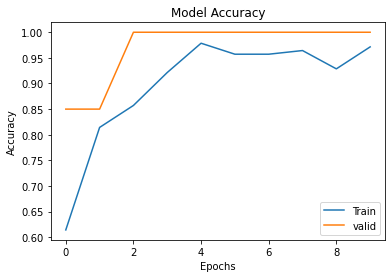

In [13]:
#Plotting model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'valid'], loc='lower right')
plt.show()

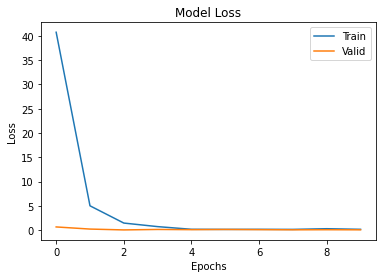

In [14]:
#Plotting model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

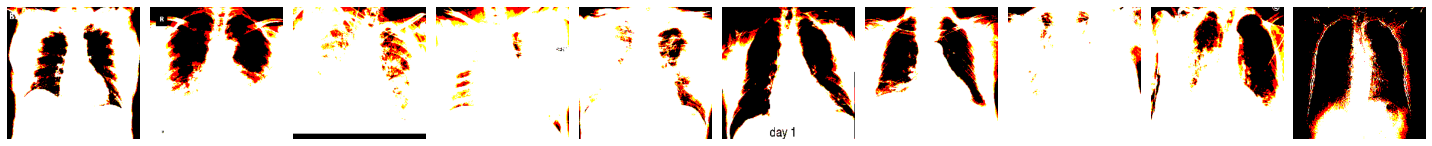

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [16]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
predictions = model.predict(x=test_batches, verbose=0)

2022-05-13 22:32:29.143048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [18]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [19]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

Confusion matrix function from scikit learn

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Accent_r):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
test_batches.class_indices

{'covid': 0, 'normal': 1}

Confusion matrix, without normalization
[[19  1]
 [ 3 17]]


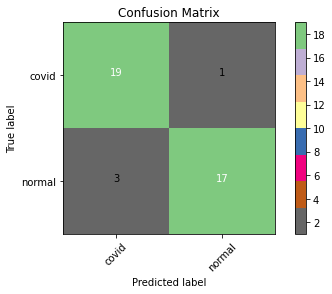

In [22]:
#Plotting the confusion matrix
cm_plot_labels = ['covid','normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

**DATA AUGMENTATION**

In [23]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1,
        height_shift_range=0.1, shear_range=0.15, zoom_range=0.1,
        channel_shift_range=10., horizontal_flip=True)

In [24]:
#Data augmentation for train data
type_classes = ['covid','normal']
for j in type_classes:
    for file in os.listdir(path+'/train/{}'.format(j)):
        image_path = path + '/train/{}/'.format(j) +file
        img = load_img(image_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        aug_iter = gen.flow(x,save_to_dir=path+'/train/{}'.format(j),save_prefix='{}'.format(j),save_format='jpeg')
        aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

In [25]:
#Data augmentation for valid data
type_classes = ['covid','normal']
for j in type_classes:
    for file in os.listdir(path+'/valid/{}'.format(j)):
        image_path = path + '/valid/{}/'.format(j) +file
        img = load_img(image_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        aug_iter = gen.flow(x,save_to_dir=path+'/valid/{}'.format(j),save_prefix='{}'.format(j),save_format='jpeg')
        aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

In [26]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['covid', 'normal'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['covid', 'normal'], batch_size=4)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['covid', 'normal'], batch_size=10, shuffle=False)

Found 1477 images belonging to 2 classes.
Found 219 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [28]:
#Early Stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=2)

In [29]:
history = model.fit(x=train_batches, validation_data=valid_batches, callbacks=[callback],epochs=20, verbose=2)

Epoch 1/20
148/148 - 25s - loss: 0.3932 - accuracy: 0.8998 - val_loss: 0.2162 - val_accuracy: 0.9269
Epoch 2/20
148/148 - 24s - loss: 0.3349 - accuracy: 0.9160 - val_loss: 0.2591 - val_accuracy: 0.9726
Epoch 3/20
148/148 - 24s - loss: 0.2806 - accuracy: 0.9350 - val_loss: 0.2933 - val_accuracy: 0.9680
Epoch 4/20
148/148 - 24s - loss: 0.2901 - accuracy: 0.9167 - val_loss: 0.2284 - val_accuracy: 0.9726
Epoch 5/20
148/148 - 25s - loss: 0.2412 - accuracy: 0.9404 - val_loss: 0.1969 - val_accuracy: 0.9772
Epoch 6/20
148/148 - 25s - loss: 0.2265 - accuracy: 0.9330 - val_loss: 0.1106 - val_accuracy: 0.9680
Epoch 7/20
148/148 - 27s - loss: 0.2240 - accuracy: 0.9120 - val_loss: 0.0961 - val_accuracy: 0.9498
Epoch 8/20
148/148 - 27s - loss: 0.2299 - accuracy: 0.9113 - val_loss: 0.1496 - val_accuracy: 0.9772
Epoch 9/20
148/148 - 27s - loss: 0.2035 - accuracy: 0.9255 - val_loss: 0.1011 - val_accuracy: 0.9772
Epoch 10/20
148/148 - 27s - loss: 0.2096 - accuracy: 0.9093 - val_loss: 0.0936 - val_accura

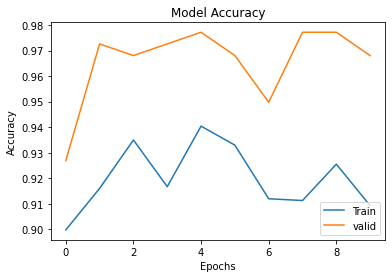

In [30]:
#Plotting model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'valid'], loc='lower right')
plt.show()

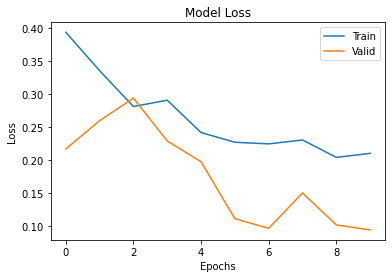

In [31]:
#Plotting model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


In [32]:
predictions = model.predict(x=test_batches, verbose=0)

In [33]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

Confusion matrix, without normalization
[[18  2]
 [ 2 18]]


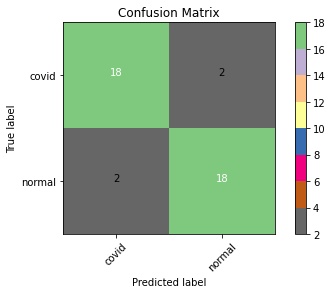

In [34]:
#Plotting the final model
cm_plot_labels = ['covid','normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [35]:
#Converting the data into percentage
cm[0][0] = (cm[0][0]/20)*100
cm[0][1] = (cm[0][1]/20)*100
cm[1][0] = (cm[1][0]/20)*100
cm[1][1] = (cm[1][1]/20)*100

Confusion matrix showuing percentage data

Confusion matrix, without normalization
[[90 10]
 [10 90]]


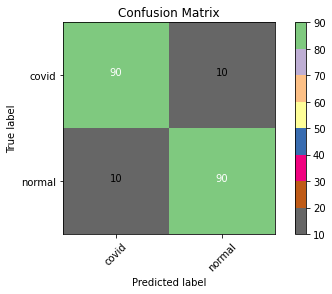

In [36]:
cm_plot_labels = ['covid','normal']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')